importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score



loading the dataset

In [2]:
data = pd.read_csv(r"C:\Users\oniyi\Desktop\system 1\data\diabetes_prediction_dataset.csv")
print(data)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

In [3]:
data['smoking_history'].unique()


array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [4]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

checking for missing data


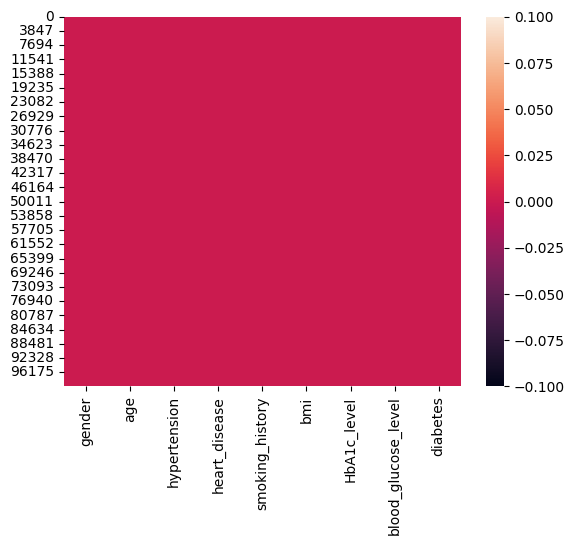

In [5]:
sns.heatmap(data.isnull())
plt.show()

Co-relation matrix

In [6]:
correlation = data.corr(numeric_only=True)
print(correlation)

                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.251171       0.233354  0.337396   
hypertension         0.251171      1.000000       0.121262  0.147666   
heart_disease        0.233354      0.121262       1.000000  0.061198   
bmi                  0.337396      0.147666       0.061198  1.000000   
HbA1c_level          0.101354      0.080939       0.067589  0.082997   
blood_glucose_level  0.110672      0.084429       0.070066  0.091261   
diabetes             0.258008      0.197823       0.171727  0.214357   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.101354             0.110672  0.258008  
hypertension            0.080939             0.084429  0.197823  
heart_disease           0.067589             0.070066  0.171727  
bmi                     0.082997             0.091261  0.214357  
HbA1c_level             1.000000             0.166733  0.400660  
blood_glucose_level     0.1

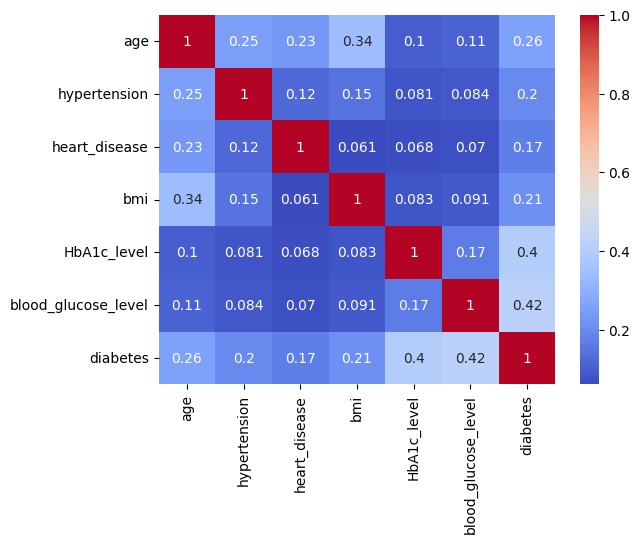

In [7]:
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

Encode categorical columns

In [8]:
encoder = LabelEncoder()
if "gender" in data.columns:
    data["gender"] = encoder.fit_transform(data["gender"])
if "smoking_history" in data.columns:
    data["smoking_history"] = encoder.fit_transform(data["smoking_history"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [10]:
data['smoking_history'].unique()


array([4, 0, 1, 3, 2, 5])

In [11]:
data['gender'].unique()


array([0, 1, 2])

In [12]:
data=data.drop('gender',axis = 1)


In [13]:
data

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,4,25.19,6.6,140,0
1,54.0,0,0,0,27.32,6.6,80,0
2,28.0,0,0,4,27.32,5.7,158,0
3,36.0,0,0,1,23.45,5.0,155,0
4,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,80.0,0,0,0,27.32,6.2,90,0
99996,2.0,0,0,0,17.37,6.5,100,0
99997,66.0,0,0,3,27.83,5.7,155,0
99998,24.0,0,0,4,35.42,4.0,100,0


Train test split

In [14]:
X = data.drop("diabetes", axis=1)
Y = data["diabetes"]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train)

        age  hypertension  heart_disease  smoking_history    bmi  HbA1c_level  \
75220  73.0             0              0                3  24.77          3.5   
48955  80.0             0              0                4  24.60          5.7   
44966  38.0             0              0                2  24.33          4.0   
13568  26.0             0              0                5  18.87          5.0   
92727  61.0             1              0                1  22.11          4.5   
...     ...           ...            ...              ...    ...          ...   
6265   49.0             0              0                4  32.98          5.7   
54886  15.0             0              0                4  28.10          5.0   
76820  42.0             0              0                4  26.14          5.8   
860    37.0             0              0                4  24.96          6.2   
15795  23.0             0              0                4  27.99          5.0   

       blood_glucose_level 

Scale numerical features

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training the model

In [16]:

model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

Making predictions

In [17]:
predictions = model.predict(X_test)

In [18]:
print(predictions)

[0 0 0 ... 0 0 0]


Evalution

In [20]:
accuracy = accuracy_score(Y_test, predictions)


In [21]:
print("Accuracy is:",accuracy)

Accuracy is: 0.9589
